<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%205.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B0/%D0%A2%D0%B5%D0%BC%D0%B0_5_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 5. Прогнозирование временных рядов с помощью градиентного бустинга

# 5.1. Решающие деревья


В этой лекции мы рассмотрим ещё одно семейство моделей машинного обучения — решающие деревья (decision trees).

Решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил (которые называются предикатами). Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.

Хотя обобщающая способность решающих деревьев невысока, их предсказания вычисляются довольно просто, из-за чего решающие деревья часто используют как кирпичики для построения ансамблей — моделей, делающих предсказания на основе агрегации предсказаний других моделей. О них мы поговорим в следующем параграфе.

#### Пример решающего дерева

Начнём с небольшого примера. На рисунке ниже изображено дерево, построенное для задачи классификации на пять классов:


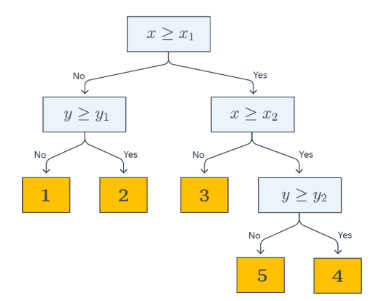


Объекты в этом примере имеют два признака с вещественными значениями: $X$ и $Y$. Решение о том, к какому классу будет отнесён текущий объект выборки, принимается с помощью прохода от корня дерева к некоторому листу.

В каждом узле этого дерева находится предикат. Если предикат верен для текущего примера из выборки, мы переходим в правого потомка, если нет — в левого. В данном примере все предикаты — это просто взятие порога по значению какого-то признака:
$$ B(x, j, t) = [x_j \leq t] $$
В листьях записаны предсказания (например, метки классов). Как только мы дошли до листа, мы присваиваем объекту ответ, записанный в вершине.

На рисунке ниже визуализирован процесс построения решающих поверхностей, порождаемых деревом:


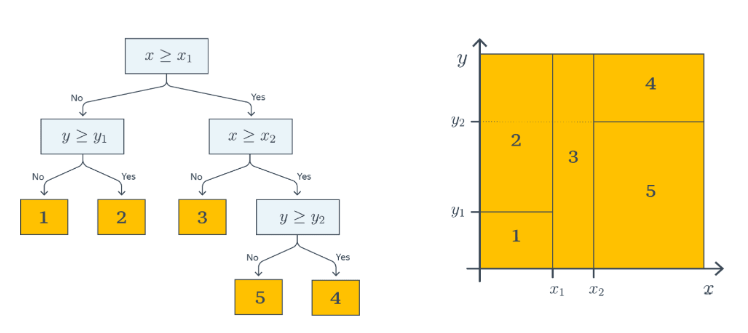

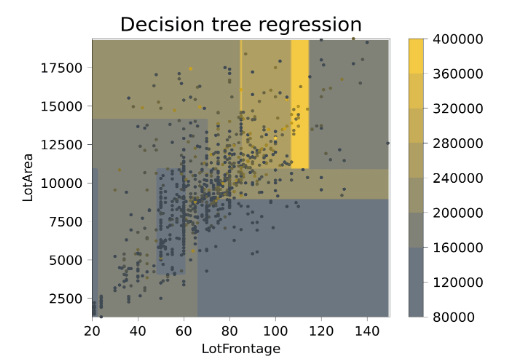


В каждой из прямоугольных областей предсказывается одна и та же стоимость.

Каждый предикат порождает разделение текущего подмножества пространства признаков на две части. На первом этапе, когда происходило деление по $[X \leq X_1]$, вся плоскость была поделена на две соответствующие части. На следующем уровне часть плоскости, для которой выполняется $X \leq X_1$, была поделена на две части по значению второго признака $Y \leq Y_1$ — так образовались области 1 и 2. То же самое повторяется для правой части дерева — и так далее до листовых вершин: получится пять областей на плоскости. Теперь любому объекту выборки будет присваиваться один из пяти классов в зависимости от того, в какую из образовавшихся областей он попадает.

Этот пример хорошо демонстрирует, что дерево осуществляет кусочно-постоянную аппроксимацию целевой зависимости. Ниже приведён пример визуализации решающей поверхности, которая соответствует дереву глубины 4, построенному для объектов данных из Ames Housing Dataset, где из всех признаков, описывающих объекты недвижимости, были выбраны ширина фасада (Lot_Frontage) и площадь (Lot_Area), а предсказать нужно стоимость.

Для более понятной визуализации перед построением дерева из датасета были выкинуты объекты с Lot_Frontage > 150 и с Lot_Area > 20000. Вот что получилось — в каждой из прямоугольных областей предсказывается одна и та же стоимость:


#### Конкретные числовые примеры

Рассмотрим небольшой набор данных:

| Lot_Frontage | Lot_Area | SalePrice |
|--------------|----------|-----------|
| 50           | 7000     | 200000    |
| 60           | 8500     | 220000    |
| 70           | 9000     | 240000    |
| 80           | 12000    | 280000    |
| 90           | 15000    | 300000    |

Построим решающее дерево для этого набора данных. Пусть дерево будет иметь глубину 2 и будет делить данные по следующим правилам:

1. Если $ Lot_Area \leq 10000 $, то:
   - Если $ Lot_Frontage \leq 55 $, то предсказание: 200000
   - Если $ Lot_Frontage > 55 $, то предсказание: 220000
2. Если $ Lot_Area > 10000 $, то:
   - Если $ Lot_Frontage \leq 85 $, то предсказание: 240000
   - Если $ Lot_Frontage > 85 $, то предсказание: 300000

Таким образом, для объекта с $ Lot_Frontage = 60 $ и $ Lot_Area = 8500 $, предсказание будет 220000, а для объекта с $ Lot_Frontage = 80 $ и $ Lot_Area = 12000 $ предсказание будет 280000.


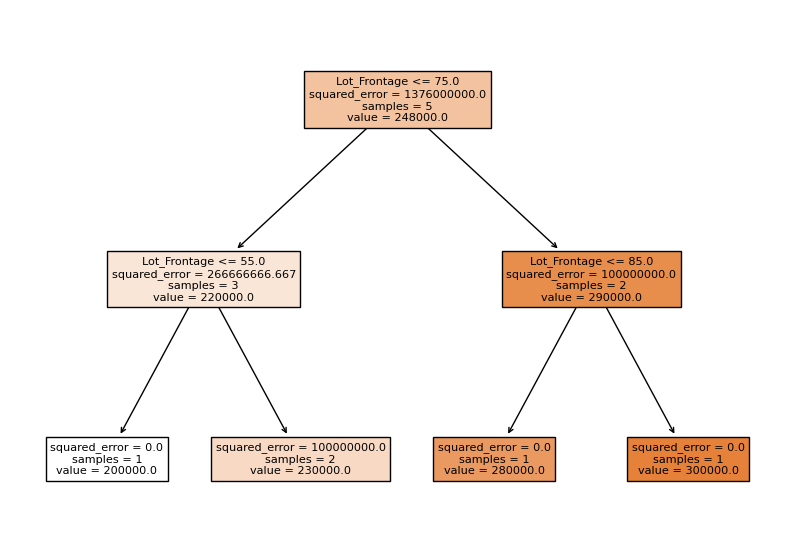

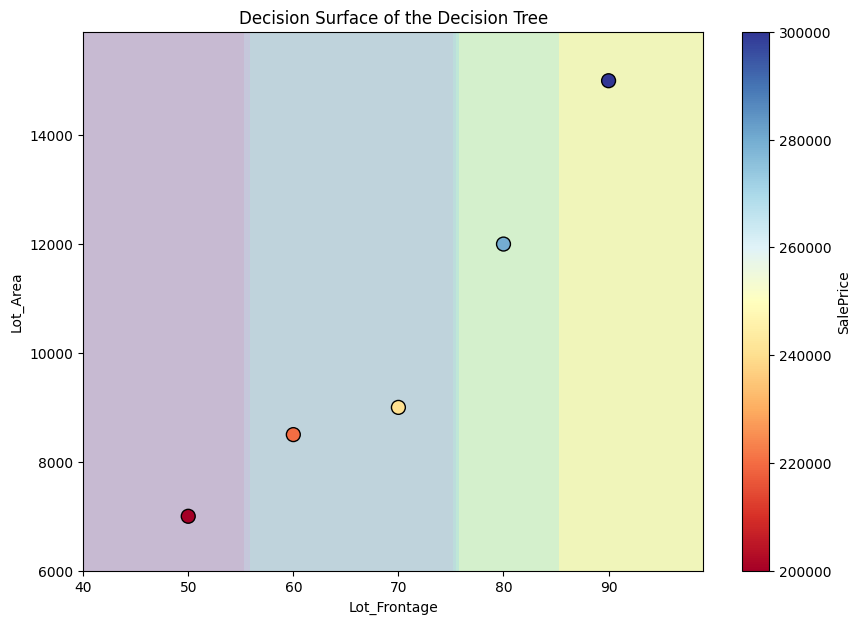

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Пример данных
X = np.array([[50, 7000], [60, 8500], [70, 9000], [80, 12000], [90, 15000]])
y = np.array([200000, 220000, 240000, 280000, 300000])

# Построение решающего дерева
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)

# Визуализация решающего дерева
plt.figure(figsize=(10, 7))
plot_tree(tree, feature_names=["Lot_Frontage", "Lot_Area"], filled=True)
plt.show()

# Визуализация решающих поверхностей
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 1000, X[:, 1].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 100))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor="k", cmap=plt.cm.RdYlBu)
plt.xlabel("Lot_Frontage")
plt.ylabel("Lot_Area")
plt.colorbar(label='SalePrice')
plt.title("Decision Surface of the Decision Tree")
plt.show()

### Определение решающего дерева

Решающее дерево — это бинарное дерево, в котором каждая внутренняя вершина $ v $ содержит предикат $ B_v: X \rightarrow \{0, 1\} $, а каждая листовая вершина $ v $ содержит прогноз $ c_v \in Y $, где $ Y $ — область значений целевой переменной (для задачи классификации может быть также вектор вероятностей классов).

Процесс предсказания начинается с корня дерева для каждого объекта выборки $ x $. На каждом узле $ v $, если значение предиката $ B_v(x) = 1 $, движение продолжается вправо, иначе — влево. Этот процесс продолжается до достижения листовой вершины, чей прогноз $ c_v $ становится ответом алгоритма для объекта $ x $.

На практике предикат $ B_v $ часто представляет собой сравнение с порогом $ t \in \mathbb{R} $ по какому-то $ j $-му признаку:
$$ B_v(x, j, t) = [x_j \leq t] $$

Из структуры дерева решений вытекают несколько ключевых свойств:
- **Кусочно-постоянная функция**: Из-за этого свойства производная функции будет равна нулю везде, кроме конечного числа точек. Это значит, что методы, основанные на градиенте, не применимы для поиска оптимального решения в случае использования деревьев решений.
  
- **Отсутствие экстраполяции**: Дерево решений не способно выходить за пределы области значений обучающей выборки. Это важно учитывать при интерпретации результатов и при использовании модели на новых данных.

- **Недообучение и переобучение**: Деревья решений могут идеально подстраиваться под обучающую выборку (что может привести к переобучению), или же слишком просто приближать данные (что может привести к недообучению). Для достижения хорошей обобщающей способности важно находить баланс между сложностью дерева и его способностью адаптироваться к новым данным.

### Иллюстрации

Под катом — несколько иллюстрация для закрепления
Сгенерируем для начала небольшой синтетический датасет для задачи классификации и обучим на нём решающее дерево, не ограничивая его потенциальную высоту.


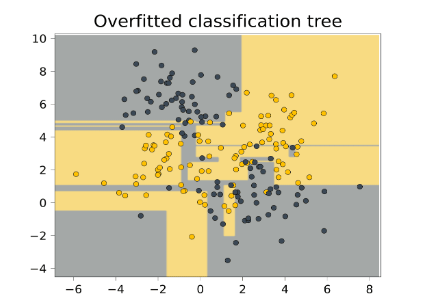



Выученная закономерность очень сложная: иногда она выделяет прямоугольником одну точку. И действительно, как мы увидим дальше, деревья умеют идеально подстраиваться под обучающую выборку. Это чемпионы переобучения. Помешать этому может лишь ограничение на высоту дерева. Вот как будет выглядеть дерево высоты 3, построенное на том же датасете:



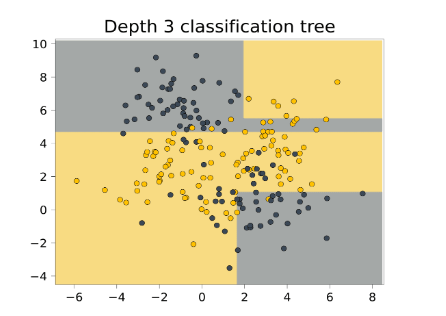



Не всё идеально, но классификатор уже не такой безумный. Теперь обратимся к задаче регрессии. Обучим решающее дерево, не ограничивая его высоту.



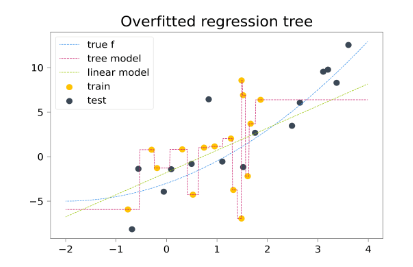



Фиолетовая ступенчатая пунктирная линия — это восстановленная деревом зависимость. На графике она мечется между точками, идеально следуя за обучающей выборкой. Кроме того (и это не лечится ограничением глубины дерева) за пределами обучающей выборки дерево делает константные предсказания. Это и имеют в виду, когда говорят, что древесные модели неспособны к экстраполяции.



### Почему построение оптимального решающего дерева — сложная задача?

Пусть у нас задан датасет $(X, y)$, где $y = \{y_i\}_{i=1}^N \subset \mathbb{R}^N$ — вектор таргетов, а $X = \{x_i\}_{i=1}^N \in \mathbb{R}^{N \times D}$, $x_i \in \mathbb{R}^D$ — матрица признаков, в которой $i$-я строка — это вектор признаков $i$-го объекта выборки. Пусть у нас также задана функция потерь $L(f, X, y)$, которую мы хотели бы минимизировать.

Наша задача — построить решающее дерево, наилучшим образом предсказывающее целевую зависимость. Однако, как уже было замечено выше, оптимизировать структуру дерева с помощью градиентного спуска не представляется возможным. Как ещё можно было бы решить эту задачу? Давайте начнём с простого — научимся строить решающие пни, то есть решающие деревья глубины 1.

Как и раньше, мы будем рассматривать только самые простые предикаты:
$$ B_{j,t}(x_i) = [x_{ij} \leq t] $$

Ясно, что задачу можно решить полным перебором: существует не более $(N-1)D$ предикатов такого вида. Действительно, индекс $j$ (номер признака) пробегает значения от $1$ до $D$, а всего значений порога $t$, при которых меняется значение предиката, может быть не более $N-1$.



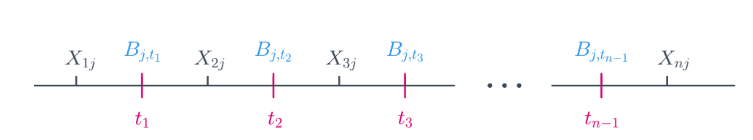



Решение, которое мы ищем, будет иметь вид:
$$ (j_{\text{opt}}, t_{\text{opt}}) = \arg \min_{j,t} L(B_{j,t}, X, y) $$

Для каждого из предикатов $B_{j,t}$ нам нужно посчитать значение функции потерь на всей выборке, что, в свою очередь, тоже занимает $O(N)$. Следовательно, полный алгоритм выглядит так:

```python
min_loss = float('inf')
optimal_border = None

for j in range(D):
    for t in X[:, j]:  # Можно брать сами значения признаков в качестве порогов
        loss = calculate_loss(t, j, X, y)
        if loss < min_loss:
            min_loss, optimal_border = loss, (j, t)
```

Сложность алгоритма — $O(N^2 D)$. Это не заоблачная сложность, хотя, конечно, не идеальная. Но это была схема возможного алгоритма поиска оптимального дерева высоты 1.

Как обобщить алгоритм для дерева произвольной глубины? Мы можем сделать наш алгоритм поиска решающего пня рекурсивным и в теле цикла вызывать исходную функцию для всех возможных разбиений. Как мы упоминали выше, так можно построить дерево, идеально запоминающее всю выборку, однако на тестовых данных такой алгоритм вряд ли покажет высокое качество.

Можно поставить другую задачу: построить оптимальное с точки зрения качества на обучающей выборке дерево минимальной глубины (чтобы снизить переобучение). Проблема в том, что поиск такого дерева — NP-полная задача, то есть человечеству пока неизвестны способы решить её за полиномиальное время. Как быть?

Идеального ответа на этот вопрос нет, но до некоторой степени ситуацию можно улучшить двумя не исключающими друг друга способами:

1. **Разрешить себе искать не оптимальное решение, а просто достаточно хорошее.** Начать можно с того, чтобы строить дерево с помощью жадного алгоритма, то есть не искать всю структуру сразу, а строить дерево этаж за этажом. Тогда в каждой внутренней вершине дерева будет решаться задача, схожая с задачей построения решающего пня. Для того чтобы этот подход хоть как-то работал, его придётся улучшить внушительным набором эвристик.

2. **Заняться оптимизацией с точки зрения computer science.** Наивную версию алгоритма (перебор наборов возможных предикатов и порогов) можно ускорить и асимптотически, и в константу раз.

Эти две идеи мы и будем обсуждать в дальнейшем. Сначала попытаемся подробно разобраться с первой — как использовать жадный алгоритм.



## Жадный алгоритм построения решающего дерева

Пусть $ X $ — исходное множество объектов обучающей выборки, а $ X_m $ — множество объектов, попавших в текущий лист (в самом начале $ X_m = X $). Тогда жадный алгоритм можно описать следующим образом:

1. Создаём вершину $ v $.
2. Если выполнен критерий остановки $ Stop(X_m) $, то останавливаемся, объявляем эту вершину листом и присваиваем ей ответ $ Ans(X_m) $, после чего возвращаем её.
3. Иначе: находим предикат (иногда говорят "сплит") $ B_{j, t} $, который определит наилучшее разбиение текущего множества объектов $ X_m $ на две подвыборки $ X_{\ell} $ и $ X_r $, максимизируя критерий ветвления $ Branch(X_m, j, t) $.
4. Для $ X_{\ell} $ и $ X_r $ рекурсивно повторяем процедуру.

Данный алгоритм включает несколько вспомогательных функций, выбор которых влияет на итоговое дерево с целью минимизации функции потерь $ L: Ans(X_m) $. Функция $ Ans(X_m) $, определяющая ответ для листа по объектам обучающей выборки, может быть следующей:
- В задаче классификации: меткой самого частого класса или оценкой дискретного распределения вероятностей классов для объектов, попавших в этот лист.
- В задаче регрессии: средним, медианой или другой статистикой.
- Простой моделью, например, листы в дереве, задающем регрессию, могут быть линейными функциями или другими моделями, обученными на данных, попавших в лист.

Критерий остановки $ Stop(X_m) $ — это функция, определяющая, нужно ли прекратить ветвление или продолжить его. Это может быть тривиальное правило, например, прекратить ветвление, когда объекты в листе становятся достаточно однородными или их количество мало.

Критерий ветвления $ Branch(X_m, feature, value) $ — ключевая компонента алгоритма, определяющая, насколько хорошо будет новое разбиение. Чаще всего эта функция оценивает улучшение какой-то метрики качества дерева при разделении объектов на два поддерева.

Хотя строгой теории, оптимально связывающей выбор различных функций и метрик качества в общем случае, не существует, существует набор интуитивных и хорошо зарекомендовавших себя подходов, которые мы обсудим далее.




Давай рассмотрим конкретный числовой пример построения решающего дерева для задачи классификации.

Предположим, у нас есть обучающая выборка из четырех объектов с двумя признаками $ X = \{(x_{1,1}, x_{1,2}), (x_{2,1}, x_{2,2}), (x_{3,1}, x_{3,2}), (x_{4,1}, x_{4,2})\} $ и соответствующими метками классов $ Y = \{0, 1, 1, 0\} $.

Жадный алгоритм построения решающего дерева можно описать следующим образом:

1. **Исходное состояние:**
   - Все объекты $ X_m = X $.
   - Множество меток классов $ Y = \{0, 1, 1, 0\} $.

2. **Шаг 1: Создание корневой вершины $ v $**

3. **Шаг 2: Критерий остановки**
   - Проверяем критерий остановки $ Stop(X_m) $. Например, можно остановиться, если все объекты в узле принадлежат одному классу или если достигнуто максимальное количество узлов.

4. **Шаг 3: Выбор предиката (сплита)**
   - Находим предикат $ B_{j, t} $, который определяет наилучшее разбиение текущего множества объектов $ X_m $ на две подвыборки $ X_{\ell} $ и $ X_r $, максимизируя критерий ветвления $ Branch(X_m, j, t) $.

5. **Пример:**
   Предположим, что для нашей выборки лучшим сплитом оказалось разбиение по первому признаку $ x_{1,1} \leq 0.5 $:
   - Левое поддерево $ X_{\ell} = \{(x_{1,1}, x_{1,2}), (x_{4,1}, x_{4,2})\} $, метки классов $ Y_{\ell} = \{0, 0\} $.
   - Правое поддерево $ X_{r} = \{(x_{2,1}, x_{2,2}), (x_{3,1}, x_{3,2})\} $, метки классов $ Y_{r} = \{1, 1\} $.

6. **Рекурсивный шаг:**
   - Для каждого поддерева $ X_{\ell} $ и $ X_{r} $ повторяем процедуру, пока не достигнем критерия остановки.

Это примерный процесс построения решающего дерева для задачи классификации на основе жадного алгоритма. Конкретный выбор критерия ветвления и критерия остановки зависит от задачи и специфики данных.


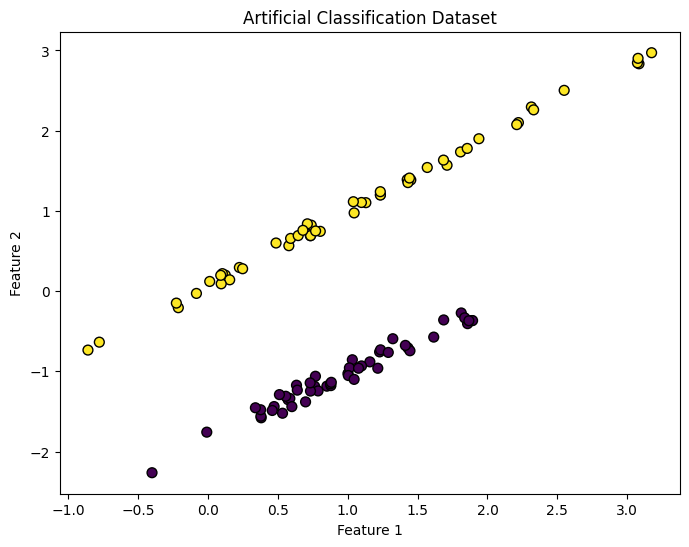

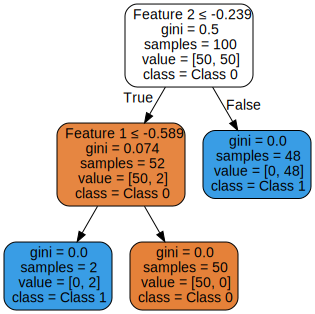

In [5]:
# Импортируем необходимые библиотеки
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import make_classification
import graphviz

# Создаем искусственные данные для примера
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Визуализация искусственных данных
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Artificial Classification Dataset')
plt.show()

# Функция для визуализации дерева решений
def plot_tree(tree):
    dot_data = export_graphviz(tree, out_file=None,
                               feature_names=['Feature 1', 'Feature 2'],
                               class_names=['Class 0', 'Class 1'],
                               filled=True, rounded=True,
                               special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

# Создаем экземпляр классификатора дерева решений
clf = DecisionTreeClassifier(random_state=42)

# Обучаем дерево решений на данных
clf.fit(X, y)

# Визуализируем построенное дерево решений
tree_graph = plot_tree(clf)
tree_graph.render('decision_tree_example', format='png')  # сохраняем в файл 'decision_tree_example.png'
tree_graph

Давайте рассмотрим конкретный числовой пример для построения решающего пня (дерева глубины 1) с использованием приведенного жадного алгоритма.

### Датасет
Пусть у нас есть следующий датасет:

| $ x_1 $ | $ x_2 $ | $ y $ |
|-----------|-----------|---------|
| 2         | 3         | 1       |
| 3         | 4         | 1       |
| 5         | 1         | 0       |
| 6         | 2         | 0       |
| 8         | 5         | 1       |

### Функция потерь
Для простоты будем использовать среднеквадратичную ошибку (MSE) в качестве функции потерь:
$$ L(f, X, y) = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i)^2 $$

### Построение решающего пня

1. **Выбор признака и порога разбиения:**
    - Переберём все возможные пороги для каждого признака и посчитаем значение функции потерь.
    
2. **Рассмотрим первый признак $ x_1 $:**
    - Возможные пороги: 2, 3, 5, 6, 8.

3. **Рассмотрим второй признак $ x_2 $:**
    - Возможные пороги: 1, 2, 3, 4, 5.

### Вычисление функции потерь для каждого порога

Для каждого порога будем разделять данные на две группы и считать среднеквадратичную ошибку для каждой группы.

#### Признак $ x_1 $:

- Порог $ t = 2 $:
  - Левая группа: $ \{ (2, 3, 1) \} $
  - Правая группа: $ \{ (3, 4, 1), (5, 1, 0), (6, 2, 0), (8, 5, 1) \} $
  - MSE левой группы: $ L_{\text{left}} = 0 $ (так как только один элемент)
  - MSE правой группы: $ L_{\text{right}} = \frac{(1 - 1)^2 + (0 - 0.25)^2 + (0 - 0.25)^2 + (1 - 0.25)^2}{4} = \frac{0 + 0.0625 + 0.0625 + 0.5625}{4} = 0.171875 $
  - Общая ошибка: $ L = \frac{1 \cdot 0 + 4 \cdot 0.171875}{5} = 0.1375 $

- Порог $ t = 3 $:
  - Левая группа: $ \{ (2, 3, 1), (3, 4, 1) \} $
  - Правая группа: $ \{ (5, 1, 0), (6, 2, 0), (8, 5, 1) \} $
  - MSE левой группы: $ L_{\text{left}} = \frac{(1 - 1)^2 + (1 - 1)^2}{2} = 0 $
  - MSE правой группы: $ L_{\text{right}} = \frac{(0 - 0.333)^2 + (0 - 0.333)^2 + (1 - 0.333)^2}{3} = \frac{0.111 + 0.111 + 0.444}{3} = 0.222 $
  - Общая ошибка: $ L = \frac{2 \cdot 0 + 3 \cdot 0.222}{5} = 0.1332 $

#### Признак $ x_2 $:

- Порог $ t = 1 $:
  - Левая группа: $ \{ (5, 1, 0) \} $
  - Правая группа: $ \{ (2, 3, 1), (3, 4, 1), (6, 2, 0), (8, 5, 1) \} $
  - MSE левой группы: $ L_{\text{left}} = 0 $
  - MSE правой группы: $ L_{\text{right}} = \frac{(1 - 0.75)^2 + (1 - 0.75)^2 + (0 - 0.75)^2 + (1 - 0.75)^2}{4} = \frac{0.0625 + 0.0625 + 0.5625 + 0.0625}{4} = 0.1875 $
  - Общая ошибка: $ L = \frac{1 \cdot 0 + 4 \cdot 0.1875}{5} = 0.15 $

### Выбор лучшего порога

Из вычисленных ошибок видно, что порог $ t = 3 $ для признака $ x_1 $ даёт наименьшую ошибку.

### Построение дерева

На основании этого порога строим решающее дерево:

- Если $ x_1 \leq 3 $, прогнозируем $ y = 1 $
- Если $ x_1 > 3 $, прогнозируем $ y = 0.333 $

### Результат

Наш решающий пень будет выглядеть следующим образом:

```
      [x1 <= 3]
      /      \
    1.0     0.333
```

Это дерево минимизирует среднеквадратичную ошибку на данном наборе данных.


Оптимальное разбиение: признак 2 <= 2, минимальная ошибка: 0.0


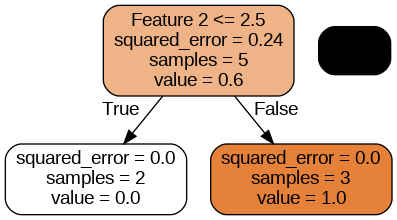

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pydotplus
from IPython.display import Image

# Пример датасета
X = np.array([[2, 3],
              [3, 4],
              [5, 1],
              [6, 2],
              [8, 5]])

y = np.array([1, 1, 0, 0, 1])

# Создаем и обучаем решающий пень (дерево глубины 1)
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X, y)

# Генерируем DOT файл для визуализации
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=['Feature 1', 'Feature 2'],
                           filled=True, rounded=True)

# Функция потерь (MSE)
def calculate_loss(t, j, X, y):
    left_indices = X[:, j] <= t
    right_indices = X[:, j] > t

    if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
        return float('inf')  # Не допустимое разбиение

    mean_left = np.mean(y[left_indices])
    mean_right = np.mean(y[right_indices])

    loss = np.mean((y[left_indices] - mean_left)**2) + np.mean((y[right_indices] - mean_right)**2)

    return loss

# Поиск оптимального разбиения для решающего пня
def find_best_split(X, y):
    min_loss = float('inf')
    optimal_border = None

    for j in range(X.shape[1]):
        for t in np.unique(X[:, j]):
            loss = calculate_loss(t, j, X, y)
            if loss < min_loss:
                min_loss = loss
                optimal_border = (j, t)

    return optimal_border, min_loss

# Находим оптимальное разбиение
optimal_border, min_loss = find_best_split(X, y)

j_opt, t_opt = optimal_border
print(f"Оптимальное разбиение: признак {j_opt + 1} <= {t_opt}, минимальная ошибка: {min_loss}")


# Создаем граф дерева из DOT файла
graph = pydotplus.graph_from_dot_data(dot_data)

# Визуализируем дерево с помощью Graphviz
Image(graph.create_png())

##Критерии ветвления: общая идея

Давайте рассмотрим популярные постановки задач машинного обучения и для каждой подберем соответствующий критерий ветвления.

### Обозначения

Для задач регрессии и классификации ответы дерева будем кодировать так: $ c \in \mathbb{R} $ — для регрессии и меток класса. В случае, когда нужно предсказать дискретное распределение по классам, $ c \in \mathbb{R}^K $ будет вектором вероятностей, где $ \sum_{i=1}^{K} c_i = 1 $.

Предположим также, что задана некоторая функция потерь $ L(y_i, c) $. О том, что это может быть за функция, мы поговорим ниже.

### Определение информативности

Когда мы ищем оптимальный сплит $ X_m = X_l \cup X_r $, важно понять, как хорошо объекты из $ X_m $ можно аппроксимировать константным значением $ c $, если текущая вершина дерева станет терминальной. Константа $ c $ должна минимизировать среднее значение функции потерь:

$$
H(X_m) = \min_{c \in \mathcal{Y}} \frac{1}{|X_m|} \sum_{(x_i, y_i) \in X_m} L(y_i, c)
$$

Это значение называется информативностью или impurity. Чем ниже это значение, тем лучше объекты в листе можно аппроксимировать константным значением.

### Пример: информативность для решающего пня

Для понимания, как информативность меняется при разделении, рассмотрим решающий пень. Пусть $ X_l $ — множество объектов, попавших в левую вершину, $ X_r $ — в правую, а $ X_m = X_l \cup X_r $. Пусть также $ c_l $ и $ c_r $ — константы, которые предсказываются в этих вершинах. Тогда функция потерь для всего пня будет равна:

$$
\frac{1}{|X_m|} \left( \sum_{x_i \in X_l} L(y_i, c_l) + \sum_{x_i \in X_r} L(y_i, c_r) \right)
$$

### Преобразование выражения

Это выражение можно преобразовать следующим образом:

$$
\frac{1}{|X_m|} \left( \sum_{x_i \in X_l} L(y_i, c_l) + \sum_{x_i \in X_r} L(y_i, c_r) \right) = \frac{|X_l|}{|X_m|} \cdot \frac{1}{|X_l|} \sum_{x_i \in X_l} L(y_i, c_l) + \frac{|X_r|}{|X_m|} \cdot \frac{1}{|X_r|} \sum_{x_i \in X_r} L(y_i, c_r)
$$

Здесь $ \frac{1}{|X_l|} \sum_{x_i \in X_l} L(y_i, c_l) $ — это информативность левого листа $ H(X_l) $, а $ \frac{1}{|X_r|} \sum_{x_i \in X_r} L(y_i, c_r) $ — информативность правого листа $ H(X_r) $.

Тогда суммарная информативность решающего пня:

$$
\frac{|X_l|}{|X_m|} H(X_l) + \frac{|X_r|}{|X_m|} H(X_r)
$$

### Разность информативностей

Чтобы понять, насколько лучше стало после разделения, сравним информативность исходной вершины $ H(X_m) $ и информативность пня:

$$
H(X_m) - \left( \frac{|X_l|}{|X_m|} H(X_l) + \frac{|X_r|}{|X_m|} H(X_r) \right)
$$

Для удобства это выражение умножают на $ |X_m| $:

$$
\text{Gain}(X_m, j, t) = |X_m| \cdot H(X_m) - |X_l| \cdot H(X_l) - |X_r| \cdot H(X_r)
$$

### Вывод

Получившаяся величина называется приростом (gain) информативности. Она всегда неотрицательна, так как разделив объекты на две группы и подобрав оптимальные константы для каждой, мы точно не сделаем хуже. Чем больше эта величина, тем лучше предлагаемый сплит.

Теперь рассмотрим критерии ветвления для типичных задач, используя вышеописанные формулы.

### Пример 1: Регрессия

#### Исходные данные

Предположим, у нас есть набор данных для регрессии:

- $ X_m = \{(1, 2), (2, 2.5), (3, 3.5), (4, 5), (5, 5.5)\} $
- $ y_i $ — целевые значения: $ \{2, 2.5, 3.5, 5, 5.5\} $
- Функция потерь: среднеквадратичная ошибка (MSE): $ L(y_i, c) = (y_i - c)^2 $

#### Шаг 1: Вычисление информативности исходной вершины

Для нахождения оптимальной константы $ c $, которая минимизирует MSE в исходной вершине $ X_m $:

$$
H(X_m) = \min_{c} \frac{1}{|X_m|} \sum_{i=1}^{5} (y_i - c)^2
$$

Минимизируемое значение $ c $ для MSE — это среднее значение $ y_i $:

$$
c = \frac{1}{5} \sum_{i=1}^{5} y_i = \frac{2 + 2.5 + 3.5 + 5 + 5.5}{5} = 3.7
$$

Теперь вычисляем MSE для этой константы:

$$
H(X_m) = \frac{1}{5} \left( (2 - 3.7)^2 + (2.5 - 3.7)^2 + (3.5 - 3.7)^2 + (5 - 3.7)^2 + (5.5 - 3.7)^2 \right)
$$

$$
= \frac{1}{5} \left( 2.89 + 1.44 + 0.04 + 1.69 + 3.24 \right) = \frac{9.3}{5} = 1.86
$$

#### Шаг 2: Выбор сплита

Допустим, мы рассматриваем сплит на два подмножества:

- $ X_l = \{(1, 2), (2, 2.5), (3, 3.5)\} $
- $ X_r = \{(4, 5), (5, 5.5)\} $

#### Шаг 3: Вычисление информативности для левого и правого подмножеств

Для $ X_l $:

$$
c_l = \frac{2 + 2.5 + 3.5}{3} = \frac{8}{3} = 2.67
$$

$$
H(X_l) = \frac{1}{3} \left( (2 - 2.67)^2 + (2.5 - 2.67)^2 + (3.5 - 2.67)^2 \right)
$$

$$
= \frac{1}{3} \left( 0.4489 + 0.0289 + 0.6889 \right) = \frac{1.1667}{3} = 0.389
$$

Для $ X_r $:

$$
c_r = \frac{5 + 5.5}{2} = \frac{10.5}{2} = 5.25
$$

$$
H(X_r) = \frac{1}{2} \left( (5 - 5.25)^2 + (5.5 - 5.25)^2 \right)
$$

$$
= \frac{1}{2} \left( 0.0625 + 0.0625 \right) = \frac{0.125}{2} = 0.0625
$$

#### Шаг 4: Вычисление прироста информативности

Теперь находим прирост информативности:

$$
\text{Gain}(X_m) = |X_m| \cdot H(X_m) - |X_l| \cdot H(X_l) - |X_r| \cdot H(X_r)
$$

$$
= 5 \cdot 1.86 - 3 \cdot 0.389 - 2 \cdot 0.0625
$$

$$
= 9.3 - 1.167 - 0.125 = 8.008
$$

Прирост информативности составляет 8.008. Это положительное значение, что означает, что предложенный сплит улучшает структуру дерева.

### Пример 2: Классификация

#### Исходные данные

Предположим, у нас есть набор данных для классификации:

- $ X_m = \{(1, A), (2, A), (3, B), (4, B), (5, A)\} $
- Метки классов: $ \{A, A, B, B, A\} $
- Функция потерь: энтропия $ L(y_i, c) = - \sum_{k} p_k \log p_k $

#### Шаг 1: Вычисление информативности исходной вершины

Посчитаем вероятности классов:

$$
p_A = \frac{3}{5}, \quad p_B = \frac{2}{5}
$$

Энтропия:

$$
H(X_m) = - \left( \frac{3}{5} \log \frac{3}{5} + \frac{2}{5} \log \frac{2}{5} \right)
$$

$$
= - \left( 0.6 \log 0.6 + 0.4 \log 0.4 \right)
$$

$$
= - \left( 0.6 \cdot (-0.2218) + 0.4 \cdot (-0.3665) \right)
$$

$$
= - (-0.1331 - 0.1466) = 0.2797
$$

#### Шаг 2: Выбор сплита

Рассмотрим сплит на два подмножества:

- $ X_l = \{(1, A), (2, A), (3, B)\} $
- $ X_r = \{(4, B), (5, A)\} $

#### Шаг 3: Вычисление информативности для левого и правого подмножеств

Для $ X_l $:

$$
p_A = \frac{2}{3}, \quad p_B = \frac{1}{3}
$$

Энтропия:

$$
H(X_l) = - \left( \frac{2}{3} \log \frac{2}{3} + \frac{1}{3} \log \frac{1}{3} \right)
$$

$$
= - \left( \frac{2}{3} \cdot (-0.1761) + \frac{1}{3} \cdot (-0.3665) \right)
$$

$$
= - \left( -0.1174 - 0.1222 \right) = 0.2396
$$

Для $ X_r $:

$$
p_A = \frac{1}{2}, \quad p_B = \frac{1}{2}
$$

Энтропия:

$$
H(X_r) = - \left( \frac{1}{2} \log \frac{1}{2} + \frac{1}{2} \log \frac{1}{2} \right)
$$

$$
= - \left( 0.5 \cdot (-0.3010) + 0.5 \cdot (-0.3010) \right)
$$

$$
= 0.3010
$$

#### Шаг 4: Вычисление прироста информативности

Теперь находим прирост информативности:

$$
\text{Gain}(X_m) = |X_m| \cdot H(X_m) - |X_l| \cdot H(X_l) - |X_r| \cdot H(X_r)
$$

$$
= 5 \cdot 0.2797 - 3 \cdot 0.2396 - 2 \cdot 0.3010
$$

$$
= 1.3985 - 0.7188 - 0.6020 = 0.0777
$$

Прирост информативности составляет 0.0777. Это положительное значение, что означает, что предложенный сплит улучшает структуру дерева.

Эти числовые примеры показывают, как вычисляется информативность и прирост информативности на каждом шаге построения дерева решений.


Давайте реализуем два примера на Python: один для регрессии и один для классификации.

Реализация

In [1]:
import numpy as np

# Данные
X_m = np.array([1, 2, 3, 4, 5])
y_m = np.array([2, 2.5, 3.5, 5, 5.5])

# Функция для вычисления MSE
def mse(y, c):
    return np.mean((y - c) ** 2)

# Оптимальная константа для исходной вершины
c_m = np.mean(y_m)
H_X_m = mse(y_m, c_m)
print(f'Информативность исходной вершины H(X_m): {H_X_m}')

# Сплит данных
X_l = np.array([1, 2, 3])
y_l = np.array([2, 2.5, 3.5])
X_r = np.array([4, 5])
y_r = np.array([5, 5.5])

# Оптимальные константы для подмножеств
c_l = np.mean(y_l)
H_X_l = mse(y_l, c_l)

c_r = np.mean(y_r)
H_X_r = mse(y_r, c_r)

print(f'Информативность левого листа H(X_l): {H_X_l}')
print(f'Информативность правого листа H(X_r): {H_X_r}')

# Прирост информативности
gain = len(X_m) * H_X_m - len(X_l) * H_X_l - len(X_r) * H_X_r
print(f'Прирост информативности: {gain}')

Информативность исходной вершины H(X_m): 1.86
Информативность левого листа H(X_l): 0.38888888888888884
Информативность правого листа H(X_r): 0.0625
Прирост информативности: 8.008333333333335


Классификация

In [2]:
import numpy as np

# Данные
X_m = np.array([1, 2, 3, 4, 5])
y_m = np.array(['A', 'A', 'B', 'B', 'A'])

# Функция для вычисления энтропии
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return -np.sum(probs * np.log2(probs))

# Энтропия для исходной вершины
H_X_m = entropy(y_m)
print(f'Энтропия исходной вершины H(X_m): {H_X_m}')

# Сплит данных
X_l = np.array([1, 2, 3])
y_l = np.array(['A', 'A', 'B'])
X_r = np.array([4, 5])
y_r = np.array(['B', 'A'])

# Энтропия для подмножеств
H_X_l = entropy(y_l)
H_X_r = entropy(y_r)

print(f'Энтропия левого листа H(X_l): {H_X_l}')
print(f'Энтропия правого листа H(X_r): {H_X_r}')

# Прирост информативности
gain = len(X_m) * H_X_m - len(X_l) * H_X_l - len(X_r) * H_X_r
print(f'Прирост информативности: {gain}')

Энтропия исходной вершины H(X_m): 0.9709505944546686
Энтропия левого листа H(X_l): 0.9182958340544896
Энтропия правого листа H(X_r): 1.0
Прирост информативности: 0.09986547010987445


### Информативность в задаче регрессии: MSE

Рассмотрим простой пример — регрессию с минимизацией среднеквадратичной ошибки:

$$ L(y_i, c) = (y_i - c)^2 $$

Информативность листа будет выглядеть следующим образом:

$$ H(X_m) = \frac{1}{|X_m|} \min_{c \in Y} \sum_{(x_i, y_i) \in X_m} (y_i - c)^2 $$

Как мы уже знаем, оптимальным предсказанием константного классификатора для задачи минимизации MSE является среднее значение, то есть:

$$ c = \frac{\sum y_i}{|X_m|} $$

Подставив это в формулу информативности сплита, получаем:

$$ H(X_m) = \frac{\sum_{(x_i, y_i) \in X_m} (y_i - \bar{y})^2}{|X_m|} $$

где

$$ \bar{y} = \frac{1}{|X_m|} \sum_i y_i $$

Таким образом, при жадной минимизации MSE информативность представляет собой оценку дисперсии таргетов для объектов, попавших в лист. Получается очень стройная картинка: оценка значения в каждом листе — это среднее, а выбирать сплиты нужно так, чтобы сумма дисперсий в листьях была как можно меньше.

### Информативность в задаче регрессии: MAE

Рассмотрим случай средней абсолютной ошибки (MAE):

$$ L(y_i, c) = |y_i - c| $$

В случае MAE в листе необходимо предсказывать медиану, так как именно медиана таргетов для обучающих примеров минимизирует MAE для константного предсказателя (как обсуждалось в параграфе о линейных моделях).

Информативность листа выражается как абсолютное отклонение от медианы:

$$ H(X_m) = \sum_{(x_i, y_i) \in X_m} |y_i - \text{Median}(Y)| $$

где $ \text{Median}(Y) $ — медиана таргетов в листе $ X_m $.

Таким образом, в случае минимизации MAE информативность листа определяется суммой абсолютных отклонений от медианы целевой переменной для объектов, попавших в лист.


### Критерий информативности в задаче классификации: misclassification error

Пусть в нашей задаче $ K $ классов, а $ p_k $ — доля объектов класса $ k $ в текущей вершине $ X_m $:

$$ p_k = \frac{1}{|X_m|} \sum_{(x_i, y_i) \in X_m} \mathbb{I}[y_i = k] $$

Где $ \mathbb{I}[\cdot] $ — индикаторная функция.

Допустим, мы интересуемся долей верно угаданных классов, то есть функция потерь задана как индикатор ошибки:

$$ L(y_i, c) = \mathbb{I}[y_i \neq c] $$

Предположим, что предсказание модели в листе — один какой-то класс $ k^* $. Информативность для такой функции потерь будет выглядеть следующим образом:

$$ H(X_m) = \min_{c \in Y} \frac{1}{|X_m|} \sum_{(x_i, y_i) \in X_m} \mathbb{I}[y_i \neq c] $$

Ясно, что оптимальным предсказанием в листе будет наиболее часто встречающийся класс $ k^* $, и выражение для информативности упростится до:

$$ H(X_m) = \frac{1}{|X_m|} \sum_{(x_i, y_i) \in X_m} \mathbb{I}[y_i \neq k^*] = 1 - p_{k^*} $$

Где $ p_{k^*} $ — доля объектов класса $ k^* $ в вершине $ X_m $.

Таким образом, в случае минимизации misclassification error информативность листа равна $ 1 $ минус доля объектов наиболее часто встречающегося класса в этом листе.

###Информативность в задаче классификации: энтропия
В задаче классификации информативность можно измерять с помощью энтропии. Если мы предсказываем вероятностное распределение классов $ (c_1, \ldots, c_K) $, то можно использовать подход, аналогичный выводу логистической регрессии через максимизацию логарифма правдоподобия (что эквивалентно минимизации отрицательного логарифма правдоподобия) для распределения Бернулли.

Предположим, что в вершине дерева предсказывается фиксированное распределение $ c $, не зависящее от $ x_i $. Тогда правдоподобие принимает вид:
$$ P(y|x,c) = P(y|c) = \prod_{(x_i, y_i) \in X_m} P(y_i | c) = \prod_{(x_i, y_i) \in X_m} \prod_{k=1}^{K} c_k^{I[y_i=k]}, $$
где $ I[\cdot] $ — индикаторная функция.

Отсюда энтропия $ H(X_m) $ определяется как:
$$ H(X_m) = \min_{c} \sum_{k=1}^{K} (-1) \sum_{(x_i, y_i) \in X_m} \sum_{k'=1}^{K} I[y_i=k'] \log c_{k'}. $$

То, что оценка вероятностей $ c_k $, минимизирующая $ H(X_m) $, должна быть равна $ p_k $, то есть доле объектов этого класса в листе, до некоторой степени очевидно, но это можно вывести и строго.

**Доказательство для любопытных:**

Из-за условия на сумму $ \sum_{k=1}^{K} c_k = 1 $ нам нужно минимизировать лагранжиан:
$$ \mathcal{L}(c, \lambda) = \min_{c, \lambda} \left( (-1|X_m| \sum_{(x_i, y_i) \in X_m} \sum_{k=1}^{K} I[y_i=k] \log c_k + \lambda \sum_{k=1}^{K} c_k ) \right). $$

Чтобы найти оптимальные значения $ c_k $, возьмем частные производные и решим уравнение:
$$ 0 = \frac{\partial}{\partial c_j} \mathcal{L}(c, \lambda) = \left( (-1|X_m| \sum_{(x_i, y_i) \in X_m} I[y_i=j] \frac{1}{c_j} + \lambda \right) = -p_j \frac{1}{c_j} + \lambda, $$
откуда получаем $ c_j = p_j / \lambda $.

Суммируя эти равенства, получаем:
$$ 1 = \sum_{k=1}^{K} c_k = \frac{1}{\lambda} \sum_{k=1}^{K} p_k = \frac{1}{\lambda}, $$
откуда $ \lambda = 1 $. Следовательно, $ c_k = p_k $.

Подставляя вектор $ c = (p_1, \ldots, p_K) $ в выражение для информативности, мы получаем энтропию распределения классов:
$$ H(X_m) = -\sum_{k=1}^{K} p_k \log p_k. $$

Это доказывает, что минимум энтропии достигается при $ c_k = p_k $, что соответствует доле объектов каждого класса в листе дерева.




**Немного подробнее об энтропии:**

Величина
$$ H(X_m) = -\sum_{k} p_k \log p_k $$
называется информационной энтропией Шеннона и измеряет степень неопределенности случайной величины. При изначальном определении Шеннон рассматривал не значения случайной величины, а символы первичного алфавита, занимаясь вопросами кодирования строк. В контексте задачи классификации энтропия имеет практический смысл — это среднее количество битов, необходимых для кодирования одного символа при заданной частоте символов алфавита.

Так как $ p_k \in [0,1] $, энтропия всегда неотрицательна. Если случайная величина принимает только одно значение, она абсолютно предсказуема, и её энтропия равна $ -1 \cdot \log(1) = 0 $.

Максимальное значение энтропии достигается для равномерно распределённой случайной величины, что отражает максимальную неопределённость среди всех величин с данной областью значений. Для равномерного распределения на множестве $ \{1, \ldots, K\} $ энтропия будет равна:
$$ -\sum_{k=1}^{K} \frac{1}{K} \log \left( \frac{1}{K} \right) = \log K. $$

На следующем графике приведены три дискретных распределения на множестве $ \{0, 1, \ldots, 20\} $ с соответствующими значениями энтропии. Как упомянуто выше, максимальную энтропию имеет равномерное распределение, в то время как два других распределения показывают разные степени остроты пика — что отражает разную степень предсказуемости величин.


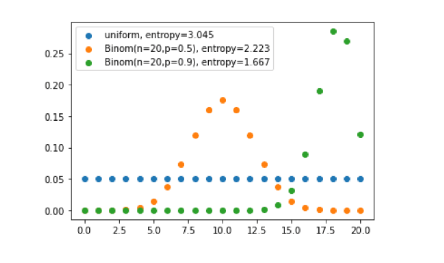

Рассмотрим пример игрушечной задачи классификации, чтобы понять, как энтропия может служить мерой неопределённости. Для трёх разбиений синтетического датасета рассчитаем их энтропии.

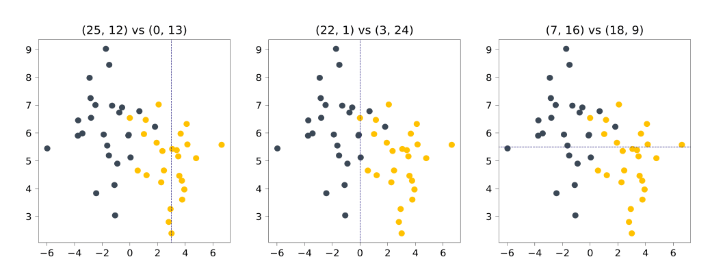




















В изначальном датасете с 25 точками каждого класса энтропия составляет:
$$ S_0 = -\frac{25}{50} \log_2 \left( \frac{25}{50} \right) - \frac{25}{50} \log_2 \left( \frac{25}{50} \right) = 1. $$

Для первого разбиения, где [$ X_1 \leq 3 $], в левой части находятся 25 точек класса 0 и 12 точек класса 1, а в правой — 0 точек класса 0 и 13 точек класса 1. Энтропия левой группы составляет:
$$ S_{\text{left}} = -\frac{25}{37} \log_2 \left( \frac{25}{37} \right) - \frac{12}{37} \log_2 \left( \frac{12}{37} \right) \approx 0.9. $$
Энтропия правой группы стремится к 0, так как там только один класс объектов:
$$ S_{\text{right}} = -0 - 1 \log_2 (1) = 0. $$

Оба разбиения показывают уменьшение общей неопределённости по сравнению с изначальным состоянием. Второе разбиение сильнее всего уменьшает энтропию, создавая два практически вырожденных распределения из почти равномерного исходного распределения. Для вышеупомянутых разбиений вычислены следующие значения энтропий:
$$ \text{Entropy}(1) \approx 16.4, \quad \text{Entropy}(2) \approx 30.5, \quad \text{Entropy}(3) \approx 7. $$

Эти результаты подтверждают интуитивное представление о том, что разбиения с более равномерным распределением по классам имеют более высокую энтропию. Шеннон изначально рассматривал свою информационную энтропию как меру неопределённости или информации, но выбрал термин "энтропия", отсылающий к аналогичному понятию в статистической механике.


Давайте рассмотрим конкретные числовые примеры для каждого типа информативности в задачах регрессии и классификации.

### Регрессия: MSE (Mean Squared Error)

Предположим, у нас есть следующие значения целевой переменной $ y $ для обучающих объектов в листе $ X_m $:

$$ y = [3, 5, 7, 4, 6] $$

Для вычисления MSE нам нужно сначала найти среднее значение $ \bar{y} $:

$$ \bar{y} = \frac{1}{5} \sum_{i=1}^{5} y_i = \frac{3 + 5 + 7 + 4 + 6}{5} = 5 $$

Теперь вычислим MSE для этих данных:

$$ \text{MSE} = \frac{1}{5} \sum_{i=1}^{5} (y_i - \bar{y})^2 $$
$$ \text{MSE} = \frac{1}{5} [(3-5)^2 + (5-5)^2 + (7-5)^2 + (4-5)^2 + (6-5)^2] $$
$$ \text{MSE} = \frac{1}{5} [4 + 0 + 4 + 1 + 1] $$
$$ \text{MSE} = \frac{10}{5} = 2 $$

Таким образом, информативность листа $ X_m $ для MSE составляет $ H(X_m) = 2 $.

### Регрессия: MAE (Mean Absolute Error)

Для того чтобы посчитать MAE, найдем медиану значений $ y $:

$$ \text{Median}(y) = 5 $$

Теперь вычислим MAE:

$$ \text{MAE} = \sum_{i=1}^{5} |y_i - \text{Median}(y)| $$
$$ \text{MAE} = |3-5| + |5-5| + |7-5| + |4-5| + |6-5| $$
$$ \text{MAE} = 2 + 0 + 2 + 1 + 1 $$
$$ \text{MAE} = 6 $$

Таким образом, информативность листа $ X_m $ для MAE составляет $ H(X_m) = 6 $.

### Классификация: Misclassification Error

Предположим, у нас есть следующие метки классов для объектов в листе $ X_m $:

$$ \text{Классы: } [0, 1, 1, 0, 1, 1, 0] $$

Для вычисления misclassification error найдем долю объектов каждого класса:

$$ p_0 = \frac{3}{7}, \quad p_1 = \frac{4}{7} $$

Тогда misclassification error для листа $ X_m $:

$$ H(X_m) = 1 - \max(p_0, p_1) $$
$$ H(X_m) = 1 - \max\left(\frac{3}{7}, \frac{4}{7}\right) $$
$$ H(X_m) = 1 - \frac{4}{7} $$
$$ H(X_m) = \frac{3}{7} $$

Таким образом, информативность листа $ X_m $ для misclassification error составляет $ H(X_m) = \frac{3}{7} $.

### Классификация: Энтропия

Пусть распределение классов в листе $ X_m $ такое:

$$ \text{Классы: } [0, 0, 1, 1, 1, 0] $$

Вычислим вероятности $ p_0 $ и $ p_1 $:

$$ p_0 = \frac{2}{6}, \quad p_1 = \frac{4}{6} $$

Тогда энтропия $ H(X_m) $:

$$ H(X_m) = - \left( p_0 \log p_0 + p_1 \log p_1 \right) $$
$$ H(X_m) = - \left( \frac{2}{6} \log \frac{2}{6} + \frac{4}{6} \log \frac{4}{6} \right) $$
$$ H(X_m) = - \left( \frac{2}{6} \log \frac{1}{3} + \frac{4}{6} \log \frac{2}{3} \right) $$
$$ H(X_m) = - \left( \frac{2}{6} \cdot (-\log 3) + \frac{4}{6} \cdot (-\log 2) \right) $$
$$ H(X_m) = - \left( -\frac{2}{6} \log 3 - \frac{4}{6} \log 2 \right) $$
$$ H(X_m) \approx 0.9183 $$

Таким образом, информативность листа $ X_m $ для энтропии составляет примерно $ H(X_m) \approx 0.9183 $.

Эти числовые примеры иллюстрируют применение различных критериев информативности в задачах регрессии и классификации. Каждый из них представляет собой меру того, насколько хорошо объекты в листе упорядочены или классифицированы после разбиения в дереве решений.



### Информативность в задаче классификации: критерий Джини

Пусть предсказание модели — это распределение вероятностей классов (𝑝₁, ..., 𝑝ₖ). Вместо логарифма правдоподобия в качестве критерия можно выбрать, например, метрику Бриера (за которой стоит всего лишь идея посчитать MSE от вероятностей). Тогда информативность получится равной
$$ 𝐻(𝑋_𝑚) = \min_{\sum_{𝑘} 𝑐𝑘=1} \frac{1}{|𝑋_𝑚|} \sum_{(𝑥_𝑖,𝑦_𝑖) \in 𝑋_𝑚} \sum_{𝑘=1}^{𝐾} (𝑐𝑘 - 𝐼[𝑦_𝑖=𝑘])^2 $$

Можно показать, что оптимальное значение этой метрики, как и в случае энтропии, достигается на векторе 𝑐, состоящем из выборочных оценок частот классов (𝑝₁, ..., 𝑝ₖ), где $ 𝑝_𝑖 = \frac{1}{|𝑋_𝑚|} \sum_{𝑖} 𝐼[𝑦_𝑖=𝑖] $. Если подставить (𝑝₁, ..., 𝑝ₖ) в выражение выше и упростить его, получится критерий Джини:
$$ 𝐻(𝑋_𝑚) = \sum_{𝑘=1}^{𝐾} 𝑝_𝑘 (1 - 𝑝_𝑘) $$

Критерий Джини также можно интерпретировать как математическое ожидание числа неправильно классифицированных объектов в случае, если мы будем приписывать им случайные метки из дискретного распределения, заданного вероятностями (𝑝₁, ..., 𝑝ₖ).

Конкретные числовые примеры помогут лучше понять критерий Джини и его интерпретацию. Предположим, у нас есть задача классификации с тремя классами (𝑘=3) и модель выдаёт следующие вероятности для объекта 𝑋_𝑚:

$$ (𝑝₁, 𝑝₂, 𝑝₃) = (0.6, 0.3, 0.1) $$

Теперь вычислим критерий Джини для этих вероятностей:

$$ 𝐻(𝑋_𝑚) = \sum_{𝑘=1}^{3} 𝑝_𝑘 (1 - 𝑝_𝑘) $$

Выполним расчёт:

$$ 𝐻(𝑋_𝑚) = 0.6 \cdot (1 - 0.6) + 0.3 \cdot (1 - 0.3) + 0.1 \cdot (1 - 0.1) $$
$$ 𝐻(𝑋_𝑚) = 0.6 \cdot 0.4 + 0.3 \cdot 0.7 + 0.1 \cdot 0.9 $$
$$ 𝐻(𝑋_𝑚) = 0.24 + 0.21 + 0.09 $$
$$ 𝐻(𝑋_𝑚) = 0.54 $$

Таким образом, критерий Джини для данного примера равен 0.54.

Интерпретация: критерий Джини можно интерпретировать как среднее количество неправильно классифицированных объектов, если бы мы случайно присваивали каждому объекту метку класса в соответствии с распределением вероятностей (0.6, 0.3, 0.1).

Этот пример демонстрирует, как критерий Джини используется для оценки качества вероятностных прогнозов в задаче многоклассовой классификации.


##Неоптимальность полученных критериев

Казалось бы, мы вывели критерии информативности для всех популярных задач, и они логично следуют из их постановок. Однако можно ли было обойти NP-полноту и научиться строить оптимальные деревья легко и быстро?

Конечно, нет. Простейший пример — решение задачи XOR с помощью жадного алгоритма и любого критерия, который мы построили выше:


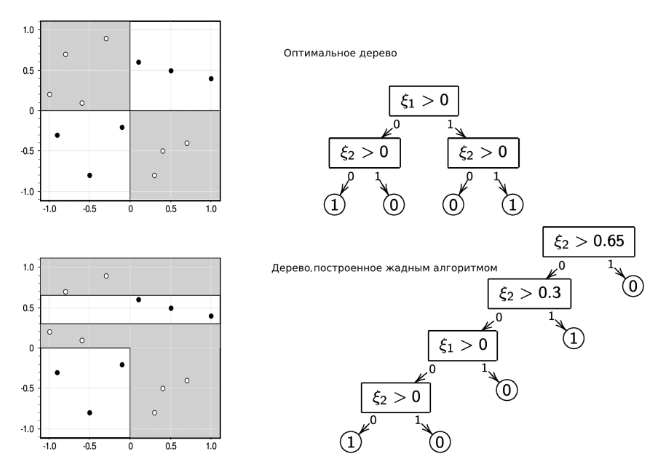






Независимо от того, что вы оптимизируете, жадный алгоритм не даст оптимального решения для задачи XOR. Однако этот пример демонстрирует лишь часть проблемы. В некоторых случаях может возникнуть ситуация, когда оптимальное с точки зрения выбранной метрики дерево будет построено с использованием критерия, несоответствующего постановке задачи (например, использование MSE-критерия для задачи, в которой используется MAE, или критерия Джини для ошибки классификации).

Особенности данных

**Категориальные признаки**

На первый взгляд, деревья отлично справляются с категориальными переменными. Если признак $ x_i $ принимает значения из множества $ C = \{ c_1, \ldots, c_M \} $, то при разбиении мы можем рассматривать любые сплиты вида $ C = C_l \cup C_r $ (где предикат имеет вид $ [x_i \in C_r] $). Это логично, но при большом $ M $ будет $ 2^M - 1 $ сплитов, что требует значительных вычислительных ресурсов. Было бы полезно упорядочить значения $ c_m $, чтобы можно было использовать их аналогично числовым данным: разделять на значения, "не меньше" и "больше" определенного порога.

Для некоторых задач можно построить такое упорядочение вполне естественным образом. Например, для задачи бинарной классификации значения $ c_m $ можно упорядочить по возрастанию доли объектов класса 1 при $ x_i = c_m $, после чего использовать их аналогично вещественным признакам. Показано, что в случае использования такого сплита с критерием энтропии или Джини он будет оптимальным среди всех $ 2^M - 1 $ возможных сплитов.

Для задачи регрессии с функцией потерь MSE можно упорядочить значения $ c_m $ по среднему значению целевой переменной на подмножестве $ \{ X \mid x_i = c_m \} $. Такой сплит также будет оптимальным.

**Работа с пропусками**

Одной из привлекательных особенностей деревьев решений является их способность обрабатывать пропуски в данных. Рассмотрим, что происходит на этапе обучения и применения дерева.

Пусть у нас есть признак $ x_i $, значение которого отсутствует у некоторых объектов. Обозначим через $ X_m $ множество объектов, попавших в рассматриваемую вершину, а через $ V_m $ подмножество $ X_m $, состоящее из объектов с пропущенным значением $ x_i $. При выборе сплита по этому признаку объекты из $ V_m $ игнорируются, и их распределяют в оба поддерева с весами $ \frac{|X_l|}{|X_m|} $ для левого поддерева и $ \frac{|X_r|}{|X_m|} $ для правого. Эти веса используются в качестве коэффициентов перед $ L(y_i, c) $ в формуле критерия информативности.

Вопрос на обсуждение: Во всех критериях ветвления участвуют мощности множеств $ X_m $, $ X_l $ и $ X_r $. Нужно ли учитывать уменьшение размера выборки в формулах для информативности? Если да, то как?

Ответ: Чтобы адекватно сравнить сплит с объектами с пропущенными значениями $ V_m $, необходимо в формуле критерия ветвления учесть их отсутствие. Мы можем рассматривать критерий так, будто объектов с пропусками нет:

$$ \text{Gain} = |X_m \setminus V_m| \cdot H(X_m) - |X_l \setminus V_m| \cdot H(X_l \setminus V_m) - |X_r \setminus V_m| \cdot H(X_r \setminus V_m) $$

Где $ H(X) $ — критерий информативности для множества $ X $.

На этапе применения дерева, если в вершину приходит объект $ x_0 $ с пропущенным значением признака $ x_i $, его отправляют в оба поддерева, усредняя предсказания $ \hat{y}_l $ и $ \hat{y}_r $ с весами $ \frac{|X_l|}{|X_m|} $ и $ \frac{|X_r|}{|X_m|} $, которые были сохранены в процессе обучения:

$$ \hat{y} = \frac{|X_l|}{|X_m|} \cdot \hat{y}_l + \frac{|X_r|}{|X_m|} \cdot \hat{y}_r $$

Это применимо как для задач регрессии, так и для задач бинарной классификации, где $ \hat{y} $ может интерпретироваться как вероятность принадлежности к классу 1.

Замечание: В случае категориальных признаков может быть полезно ввести дополнительное значение "пропущено" и обрабатывать пропуски как обычные значения. Это особенно актуально в случаях, когда пропуски не случайны и могут нести важную информацию.



https://education.yandex.ru/handbook/ml/article/reshayushchiye-derevya

https://education.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii

